2020-11-01

---CHANGES---

No major changes.


---SUMMARY---
total metadata rows: 332458
CORD UIDs (new: 1938, removed: 409)

Full text:
  PDF - 123513 json (new: 549, removed: 3136)
  PMC - 91446 json (new: 2)

---------------------------
2020-10-31

---CHANGES---

No major changes.


---SUMMARY---
total metadata rows: 330801
CORD UIDs (new: 8221, removed: 71)

Full text:
  PDF - 126099 json (new: 1005, removed: 557)
  PMC - 91444 json (new: 474)

---------------------------


2020-10-29

---CHANGES---

No major changes.


---SUMMARY---
total metadata rows: 322441
CORD UIDs (new: 4697, removed: 1314)

Full text:
  PDF - 125651 json (new: 3179, removed: 209)
  PMC - 90970 json (new: 305, removed: 1)

---------------------------
2020-10-28

---CHANGES---

No major changes.


---SUMMARY---
total metadata rows: 320518
CORD UIDs (new: 1290, removed: 409)

Full text:
  PDF - 122679 json (new: 1311, removed: 616)
  PMC - 90666 json (new: 512, removed: 1)

---------------------------
2020-10-

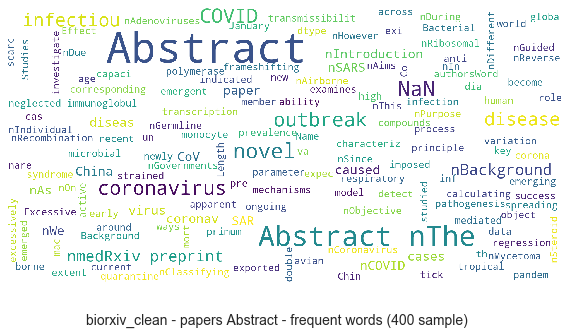

[['abstract', 'we', 'model', 'the', 'extent', 'to', 'which', 'age', 'targeted', 'quarantine', 'can', 'be', 'used', 'to', 'reduce', 'icu', 'admissions', 'caused', 'by', 'novel', 'coronavirus', 'covid', 'using', 'demographic', 'data', 'from', 'new', 'zealand', 'we', 'demonstrate', 'that', 'lowering', 'the', 'age', 'threshold', 'for', 'quarantine', 'to', 'years', 'of', 'age', 'reduces', 'icu', 'admissions', 'drastically', 'and', 'show', 'that', 'for', 'sufficiently', 'strict', 'isolation', 'protocols', 'isolating', 'one', 'third', 'of', 'the', 'countries', 'population', 'for', 'total', 'of', 'months', 'is', 'sufficient', 'to', 'avoid', 'overwhelming', 'icu', 'capacity', 'throughout', 'the', 'entire', 'course', 'of', 'the', 'epidemic', 'similar', 'results', 'are', 'expected', 'to', 'hold', 'for', 'other', 'countries', 'though', 'some', 'minor', 'adaption', 'will', 'be', 'required', 'based', 'on', 'local', 'age', 'demographics', 'and', 'hospital', 'facilities', 'cc', 'by', 'international', 

In [16]:


# %%


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import spacy
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim



import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from PIL import PILLOW_VERSION
from nltk.stem import WordNetLemmatizer
import spacy
import tensorflow as tf


# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
n = 1000


# Any results you write to the current directory are saved as output.


import bert

import itertools

from nltk.stem import WordNetLemmatizer


import nltk
### To install nltk take out comments from next few lines

#import ssl

#try:
#   _create_unverified_https_context = ssl._create_unverified_context
#except AttributeError:
#   pass
#else:
#   ssl._create_default_https_context = _create_unverified_https_context

#nltk.download()

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['background', 'methods', 'introduction', 'conclusions', 'results',
                   'purpose', 'materials', 'discussions','methodology','result analysis'])
# %% Reading Directory

# os.listdir('../Users/raghavkhandelwal/PycharmProjects/Stanford/CORD19_CS_221/CORD-19/')
os.listdir(os.path.expanduser('~/Downloads/CORD19/'))

with open(os.path.expanduser('~/Downloads/CORD19/metadata.readme')) as f:
    data = f.read()
    print(data)


biorxiv_dir = os.listdir(os.path.expanduser('~/Downloads/CORD19/biorxiv_medrxiv/'))
print("Number of articles retrieved from biorxiv:", len(biorxiv_dir))


biorxiv_clean = pd.read_csv(os.path.expanduser('~/Downloads/CORD19/biorxiv_clean.csv'))
clean_comm_use = pd.read_csv(os.path.expanduser('~/Downloads/CORD19/clean_comm_use.csv'))
clean_noncomm_use =  pd.read_csv(os.path.expanduser('~/Downloads/CORD19/clean_noncomm_use.csv'))
clean_pmc =  pd.read_csv(os.path.expanduser('~/Downloads/CORD19/clean_pmc.csv'))

biorxiv_clean.head(2)
clean_comm_use.head(2)
clean_noncomm_use.head(2)
clean_pmc.head(2)
biorxiv_clean.text[0]




from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

stopwords = set(STOPWORDS)
#https://www.kaggle.com/gpreda/cord-19-solution-toolbox

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=30,
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(biorxiv_clean['abstract'], title = 'biorxiv_clean - papers Abstract - frequent words (400 sample)')

df = biorxiv_clean
df = df.abstract.dropna()
data = df.values.tolist()

# *I have downloaded simsentence.csv from version 1's output of this kernel and now using that csv file in cell below for little analysis *
simsentence = pd.read_csv(os.path.expanduser('~/Downloads/CORD19//simsentence.csv'))



def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words = list(sent_to_words(data))

print(data_words[:1])


# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=20) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=20)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])


def remove_stopwords(texts):

    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

import spacy
from spacy.lang.en import English
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#or
#spacy.cli.download("en")
nlp = spacy.load('en', disable=['parser', 'ner'])


# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[1])

print(data_lemmatized[:1])


# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

# Topic Modeling
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True
                                        )

#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Computing proplexity and coherence score

print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [17]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

pyLDAvis.save_html(vis, './lda4topics_v2.html')


optimal_model = lda_model

model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


[(0,
  '0.110*"patient" + 0.030*"level" + 0.019*"covid" + 0.019*"year" + '
  '0.018*"group" + 0.012*"severe" + 0.012*"symptom" + 0.011*"clinical" + '
  '0.011*"compare" + 0.011*"case" + 0.011*"mycetoma" + 0.010*"day" + '
  '0.010*"cytokine" + 0.010*"infection" + 0.009*"mild" + 0.009*"confirm" + '
  '0.009*"study" + 0.007*"duration" + 0.007*"disease" + 0.007*"preprint"'),
 (1,
  '0.033*"covid" + 0.013*"study" + 0.013*"use" + 0.011*"test" + '
  '0.008*"increase" + 0.007*"non" + 0.007*"high" + 0.006*"factor" + '
  '0.006*"pandemic" + 0.006*"death" + 0.006*"rate" + 0.006*"infection" + '
  '0.005*"abstract" + 0.005*"time" + 0.005*"base" + 0.005*"find" + 0.005*"age" '
  '+ 0.005*"low" + 0.005*"license" + 0.005*"include"'),
 (2,
  '0.024*"model" + 0.019*"case" + 0.016*"transmission" + 0.013*"number" + '
  '0.013*"estimate" + 0.013*"use" + 0.012*"spread" + 0.012*"datum" + '
  '0.011*"epidemic" + 0.011*"infection" + 0.011*"outbreak" + 0.008*"abstract" '
  '+ 0.008*"population" + 0.008*"country"

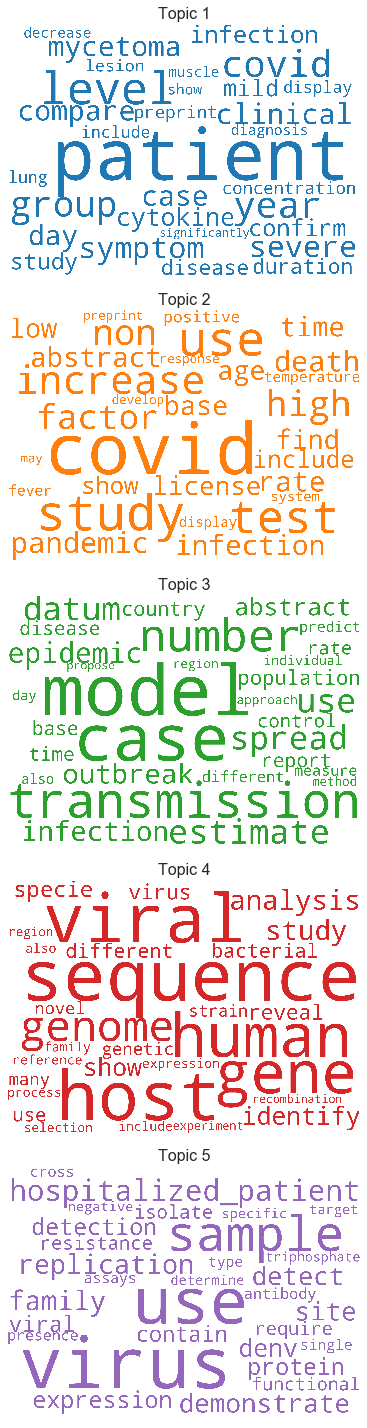

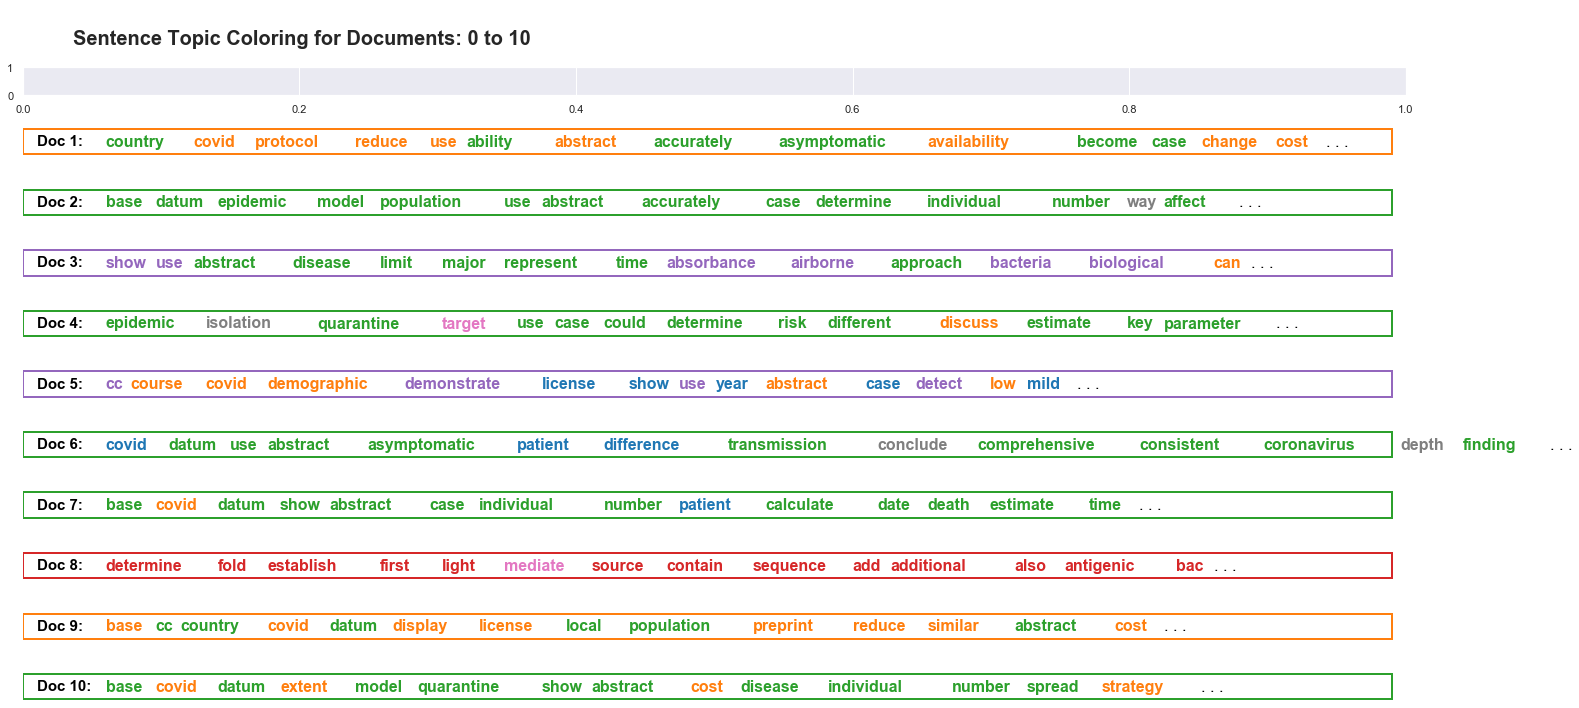

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1230 samples in 0.006s...
[t-SNE] Computed neighbors for 1230 samples in 0.029s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1230
[t-SNE] Computed conditional probabilities for sample 1230 / 1230
[t-SNE] Mean sigma: 0.075245
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.321518
[t-SNE] KL divergence after 1000 iterations: 0.625994


Loading BokehJS ...

['model extent age target quarantine can use reduce icu admission cause novel covid use demographic datum demonstrate lower age threshold quarantine year age reduce icu admission drastically show sufficiently strict isolation protocol isolate third country population total month sufficient avoid overwhelming icu capacity entire course epidemic similar result expect hold other country minor adaption will require base local age demographic hospital facility international license make available author funder grant medrxiv license display preprint perpetuity peer review copyright holder preprint', 'abstract current covid pandemic testing kit extraction kit availability become major limit factor ability determine patient disease status accurately quantify prevalence current testing strategy rely individual test case match restrictive diagnostic criterion detect limit testing asymptomatic mild case test individual effective way understand reduce spread here develop pool testing strategy iden

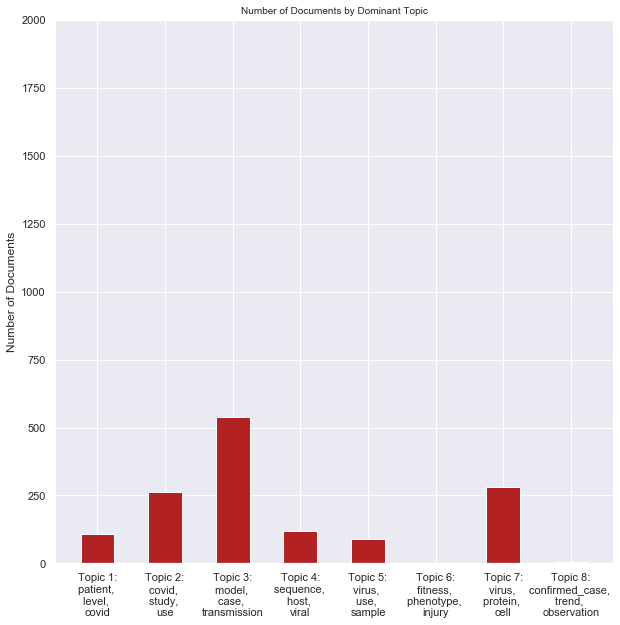

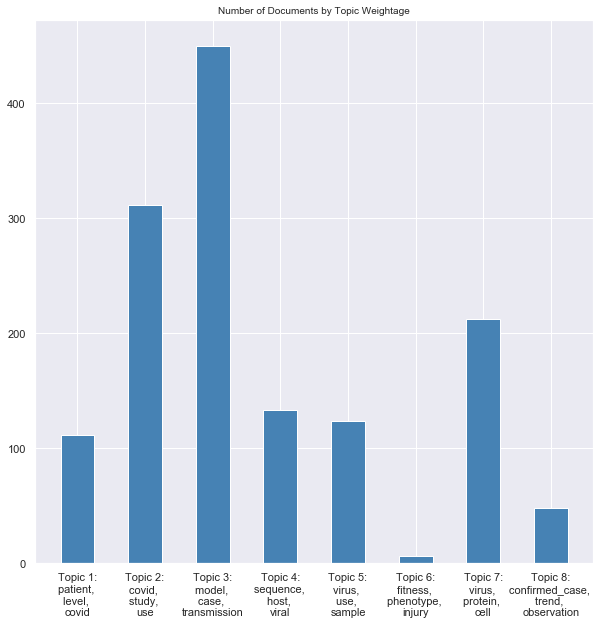

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Model's Params:  {'learning_decay': 0.9, 'n_components': 10}
Best Log Likelihood Score:  -374765.86580305354
Model Perplexity:  774.4445744674831


[2, 1, 4, 3, 6, 0, 5, 7]

In [18]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False,
                               num_words=30)

fig, axes = plt.subplots(5, 1, figsize=(10,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=500)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i + 1), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 12):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(22, 10))
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 1:
            #i = i+1
            corp_cur = corp[i-1]
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=15, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += 0.009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=20, x = 0.2, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

corp = corpus[0:13]
corp_cur = corp[13-1]
topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
word_dominanttopic

def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False)
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)


import bokeh
from bokeh.models import HoverTool
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 5
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])


plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics),
              plot_width=800, plot_height=600)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

    # # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
    # # Run in terminal: python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

    # # Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

from matplotlib.ticker import FuncFormatter

# Plot

fig, ax1  = plt.subplots(1, figsize=(10, 10))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x + 1)+ ':\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 2000)

plt.show()

df_dominant_topic_in_each_doc

fig, ax2  = plt.subplots(1, figsize=(10, 10))
# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

vectorizer = CountVectorizer(analyzer='word', min_df=10,                        # minimum reqd occurences of a word
                              stop_words='english',             # remove stop words
                              lowercase=True,                   # convert all words to lowercase
                              token_pattern='[a-zA-Z0-9]{3,}'  # num chars > 3
                              # max_features=50000,             # max number of uniq words
                             )
data_vectorized = vectorizer.fit_transform(data_lemmatized)

search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation(n_jobs=-1)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)


# Do the Grid Search
model.fit(data_vectorized)


best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

categories = list(df.Dominant_Topic.unique())
categories